In [1]:
from itertools import count

from dotenv import load_dotenv
load_dotenv(override=True)

True

In [8]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = OpenAI()
nest_asyncio.apply()

@traceable
def generate_response(question: str):
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable(
    metadata={"model_name": MODEL_NAME, "model_provider": MODEL_PROVIDER}
)
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

#  A simple chatbot without chat history
@traceable
def chat_bot():
    count=1
    while True:
        question=input("Enter your question: ")
        if question == "exit":
            break
        response = langsmith_rag(question, langsmith_extra={"metadata": {"Question Number": str(count)}})
        count=count+1;
        print(response)



chat_bot()



Humans created AI primarily to enhance problem-solving capabilities, automate repetitive tasks, and improve efficiency in various fields. The desire to understand and replicate human intelligence also played a significant role in the development of AI.

The origins of AI can be traced back to the mid-20th century. The formal foundation was laid in 1956 during the Dartmouth Conference, where key figures like John McCarthy, Marvin Minsky, Nathaniel Rochester, and Claude Shannon gathered to discuss the potential of machines to simulate human intelligence. This event is often considered the birth of AI as a field of study. Early work included symbolic reasoning, problem-solving, and the development of algorithms that could mimic human cognitive functions. Over the decades, advancements in computer science, mathematics, and neuroscience have further propelled the evolution of AI technologies.
I don't have personal opinions or feelings, but I can provide information. Humanity is often viewed

### RUN TREE FOR THIS LLM APPLICATION WITH @traceable

This is a basic runtree for this application with normal @traceable decorators

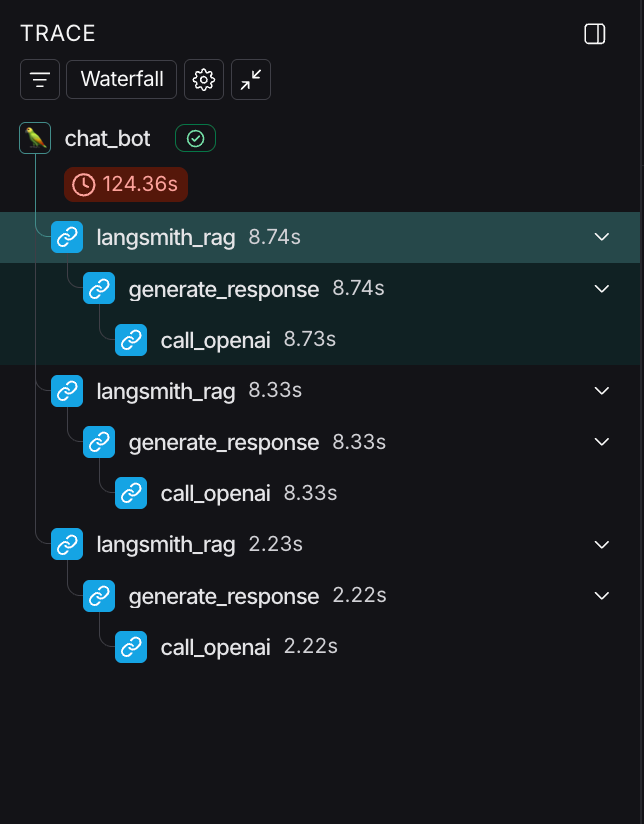

One of the questions asked to teh chatbot

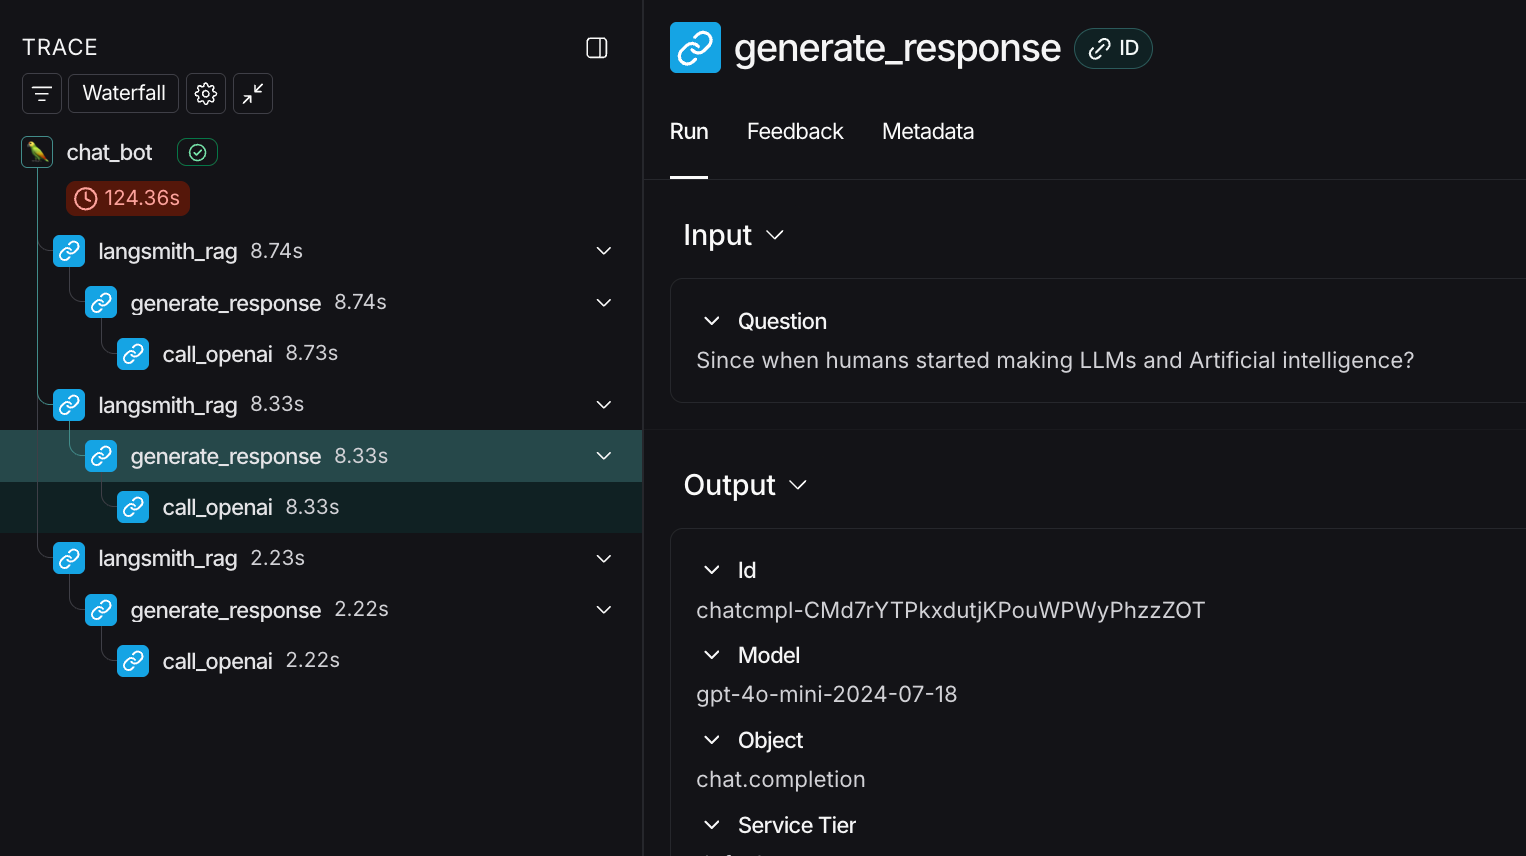



### RUN TREE FOR THIS LLM APPLICATION USIN @tracable and Metadata

Here in the metadata I am storing the count of the questions has asked from the chatbot ( stored during runtime)  and the model name and provider for the chatbot.

We can see the question number as 1 in this call:

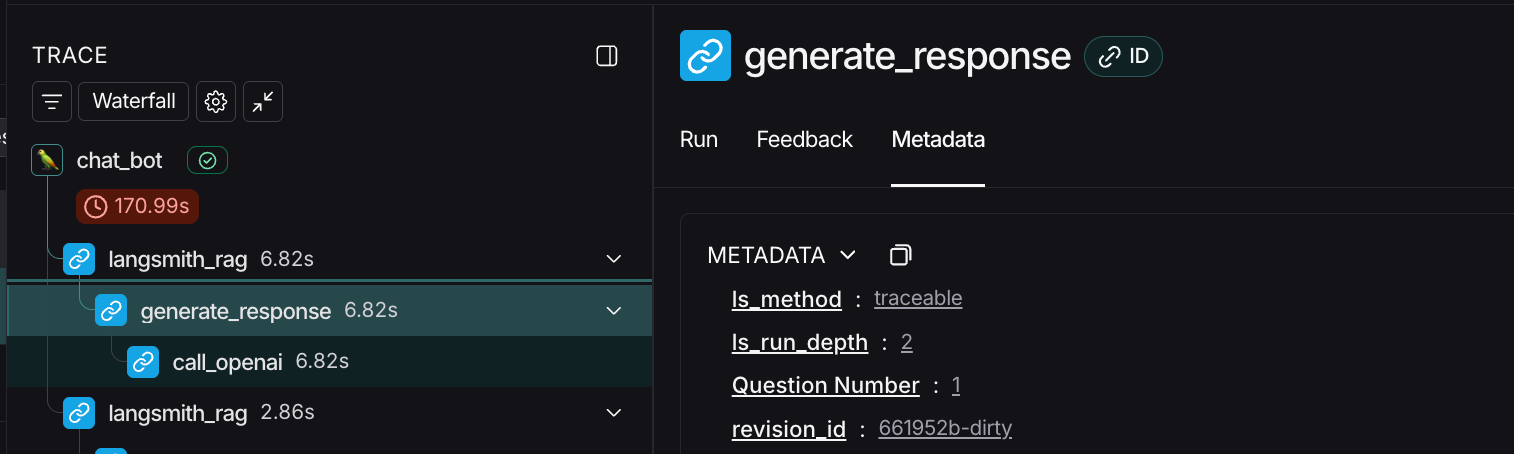

We can see the question number as 2 in the second call:

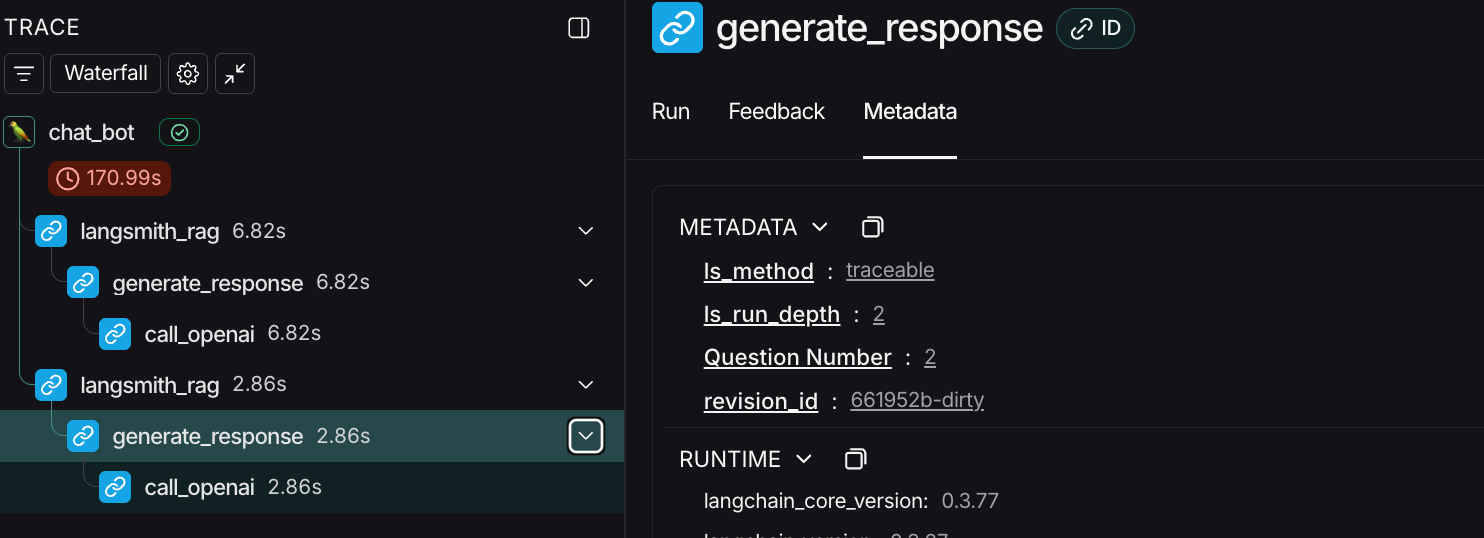

We can also see the metadata for call_openai:

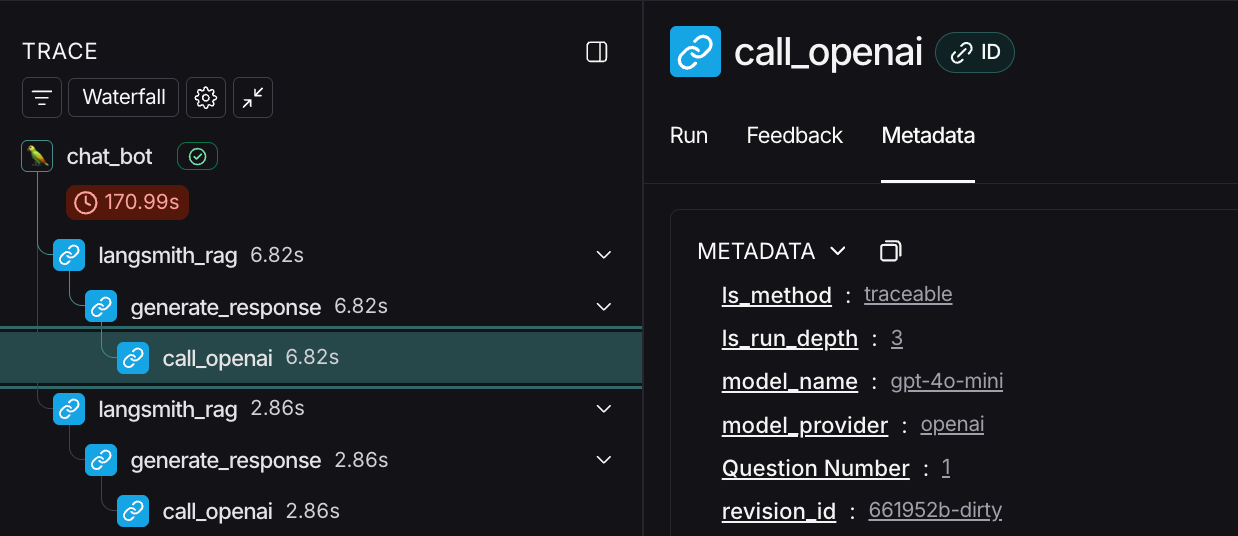

